<a href="https://colab.research.google.com/github/JoviJam/ASSIP1/blob/main/WTandHT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [4]:
x=pd.read_csv('WTandHT_Data_2017_2018.csv')

In [5]:
x.head(10)

,BMXWT,BMXHT
0,13.7,88.6
1,13.9,94.2
2,79.5,158.3
3,66.3,175.7
4,45.4,158.4
5,53.5,150.2
6,88.8,151.1
7,10.2,NaN
8,62.1,170.6
9,58.9,172.8


In [33]:
x.shape

(8704, 2)

The data set has 8,704 rows and 2 columns.

In [7]:
x['BMXWT'].mean()

65.13850815850815

The average weight of the Americans in 2017 is around 65 kg.

In [8]:
x['BMXWT'].std()

32.89075375875455

The standard deviation, a measure of how dispersed a data set is, of the weights of everyone is nearly 33 kg.

---



In [9]:
x['BMXHT'].mean()

156.59340069860278

The average height of everyone in this data set is around 157 kg.

In [10]:
x['BMXHT'].std()

22.257858154908728

The standard deviation, a measure of how dispersed a data set is, of the heights of everyone is nearly 22 kg.


In [11]:
import matplotlib.pyplot as plt

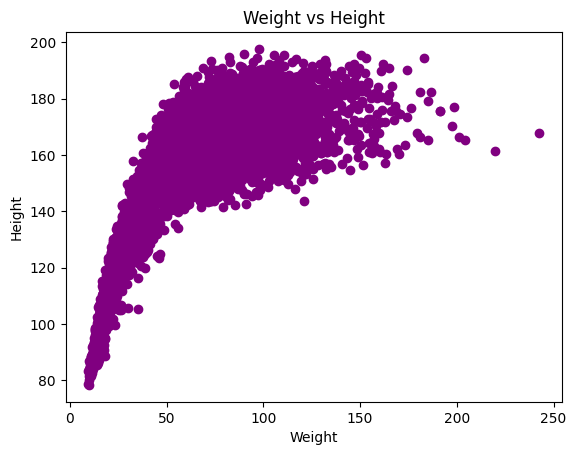

In [14]:
plt.plot(x['BMXWT'],x['BMXHT'], 'o', color = 'purple')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height')
plt.show()

The overall shape of the scatterplot is a logarithmic function. As the weight increases, the height increases as well, but at a certain point, the positive correlation begins to level off. This trend is probably because a human being can only grow so tall that at some point, it doesn't matter what their weight is.

In [15]:
import numpy as np

In [22]:
x.dropna()
x['BMXWT'].fillna(x['BMXWT'].mean(), inplace=True)
x['BMXHT'].fillna(x['BMXHT'].mean(), inplace=True)

When first trying to compute the correlation coefficient between the height and the weight using the corrcoef command, nan values are returned. There are several reasons for this, such as there are empty or null values. The three lines of code above drop all the empty rows, and they fill the nan values with the means of that respective column.

In [23]:
np.corrcoef(x['BMXWT'],x['BMXHT'])

array([[1.        , 0.68689578],
       [0.68689578, 1.        ]])

The correlation coefficient between weight and height is around 0.68, which shows that they aren't that correlated.

In [31]:
log_x = np.log(x['BMXWT'])
coefficients = np.polyfit(log_x, x['BMXHT'], 1)
a, b = coefficients
log_fit_line = a * np.log(x['BMXWT']) + b
print(a, b)

19.643234667035372 78.35514063425084


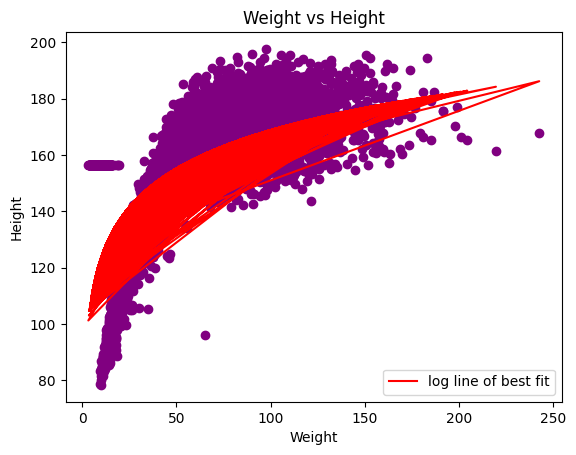

In [32]:
plt.plot(x['BMXWT'],x['BMXHT'], 'o', color = 'purple')
plt.plot(x['BMXWT'], log_fit_line, color = 'red', label = 'log line of best fit')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height')
plt.legend()
plt.show()

The regression line is approximately 19.5(logx) + 78. The height of someone who was 80 kg would be around 115 cm.